In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [47]:
# Here only taking 15k records
new_df = pd.read_csv("QQ.csv")    

In [6]:

new_df.head(5)

,Unnamed: 0,Unnamed: 0.1,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
new_df.shape

(15000, 8)

In [7]:
new_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'qid1', 'qid2', 'question1',
       'question2', 'is_duplicate'],
      dtype='object')

In [13]:
new_df.drop(["Unnamed: 0",'Unnamed: 0.1','id'],axis=1, inplace=True)

In [14]:
new_df.head(5)

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [15]:
new_df.isnull().sum()

qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


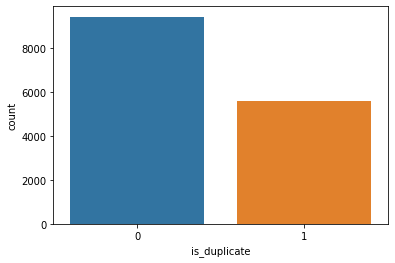

In [46]:
sns.countplot(new_df.is_duplicate)

In [16]:
from nltk.stem.porter import PorterStemmer
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def listStream(value):
    mylist = []
    for i in range(0,len(new_df)): 
        review = re.sub('[^a-zA-Z]',' ',new_df[value][i])
        review = review.lower()
        review = review.split()
        v = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        v = ' '.join(v)
        mylist.append(v)
    
    return mylist

In [19]:
qn1 = listStream("question1")
qn2 = listStream("question2")

In [20]:
for a,b in zip(qn1[:5],qn2[:5]):
    print(f" {a} --- {b} ")

 step step guid invest share market india --- step step guid invest share market 
 stori kohinoor koh noor diamond --- would happen indian govern stole kohinoor koh noor diamond back 
 increas speed internet connect use vpn --- internet speed increas hack dn 
 mental lone solv --- find remaind math math divid 
 one dissolv water quikli sugar salt methan carbon di oxid --- fish would surviv salt water 


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X_1 = cv.fit_transform(qn1).toarray()
X_2 = cv.fit_transform(qn2).toarray()

In [22]:
count_vect_X = np.hstack((X_1,X_2))

In [23]:

Y = new_df.is_duplicate.values

In [24]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(count_vect_X,Y, random_state=101, test_size=0.20)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [50]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc.predict(x_test))

# 0.6803333333333333  With Count Vector

0.6803333333333333